In [1]:
def getDoc(y):
    for x in y.__doc__.split('\n'):
        print(x)
        
# getDoc(pd.DataFrame.append)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fileNameTrain = 'train.csv'
fileNameTest  = 'test.csv'

dfTrain = pd.read_csv(fileNameTrain)
dfTest  = pd.read_csv(fileNameTest)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from xgboost import XGBRegressor
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
print(lgb.__version__)

2.2.3


### Lets have a first look at the data 

In [67]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
dfTrain.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Attalah, Miss. Malake",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Check if PassengerId is unique

In [69]:
print(dfTrain.shape,len(set(dfTrain['PassengerId'])))
print(dfTest.shape,len(set(dfTest['PassengerId'])))

(891, 12) 891
(418, 11) 418


### Extract Lastname and Title for Name and add to table

In [70]:
for df in [dfTrain,dfTest]:
    lastName = [x.split(', ')[0] for x in df.Name]
    title    = [x.split(', ')[1].split('. ')[0] for x in df.Name]
    #replace some titles
    title    = [x.replace('Mme', 'Mrs') for x in title]
    title    = [x.replace('Ms', 'Miss') for x in title]
    title    = [x.replace('Mlle', 'Miss') for x in title]
    title    = [x.replace('the Countess', 'Lady') for x in title]
    title    = [x.replace('Jonkheer', 'Sir') for x in title]
    title    = [x.replace('Capt', 'Col') for x in title]
    title    = [x.replace('Dona', 'Mrs') for x in title]
    title    = [x.replace('Don', 'Mr') for x in title]
    
    title    = [x.replace('Dr', 'Col') for x in title]
    title    = [x.replace('Major', 'Col') for x in title]
    title    = [x.replace('Rev', 'Col') for x in title]
    title    = [x.replace('Sir', 'Col') for x in title]

    
    df['Lastname'] = lastName
    df['Title']    = title

In [71]:
print(dfTrain['Title'].unique())
print(dfTest['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Col' 'Lady']
['Mr' 'Mrs' 'Miss' 'Master' 'Col']


## Extract Familisize and add to table

In [72]:
for df in [dfTrain,dfTest]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
for df in [dfTrain,dfTest]:    
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

## Clean TicketID

In [73]:
for df in [dfTrain,dfTest]:
    ticketClean = [x for x in df.Ticket]
    ticketClean = [x.replace('W./C.', 'W/C') for x in ticketClean]
    ticketClean = [x.replace('STON/O 2', 'STON/O2') for x in ticketClean]
    ticketClean = [x.replace('C.A.', 'CA') for x in ticketClean]
    ticketClean = [x.replace('CA.', 'CA') for x in ticketClean]
    ticketClean = [x.replace('A.', 'A') for x in ticketClean]
    ticketClean = [x.replace('A/', 'A') for x in ticketClean]
    ticketClean = [x.replace('SOTON/O.Q.', 'SOTON/OQ') for x in ticketClean]
    ticketClean = [x.replace('A4.', 'A4') for x in ticketClean]
    ticketClean = [x.replace('A5.', 'A5') for x in ticketClean]
    ticketClean = [x.replace('W.E.P.', 'WEP') for x in ticketClean]
    ticketClean = [x.replace('WE/P', 'WEP') for x in ticketClean]
    ticketClean = [x.replace('A 2.', 'A2') for x in ticketClean]

    df['TicketClean'] = ticketClean

In [74]:
freq_port = dfTrain.Embarked.dropna().mode()[0]
dfTrain['Embarked'] = dfTrain['Embarked'].fillna(freq_port)
dfTest['Embarked']  = dfTest['Embarked'].fillna(freq_port)

### Encode relevant non-numerical columns

In [75]:
label_encoder = LabelEncoder()
for col in sorted(['Sex','Ticket','Lastname','Title','TicketClean','Embarked']):
    label_encoder.fit(dfTrain[col].append(dfTest[col]))
    dfTrain[col] = label_encoder.transform(dfTrain[col])
    dfTest[col] = label_encoder.transform(dfTest[col])
    print(col,' - done')

# Manuel version    
#for dataset in [dfTrain, dfTest]:
#    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Embarked  - done
Lastname  - done
Sex  - done
Ticket  - done
TicketClean  - done
Title  - done


In [76]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Title,FamilySize,IsAlone,TicketClean
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,720,7.2500,NaN,2,100,4,2,0,719
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,816,71.2833,C85,0,182,5,2,0,816
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,914,7.9250,NaN,2,329,3,1,1,906
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,65,53.1000,C123,2,267,5,2,0,65
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,649,8.0500,NaN,2,15,4,1,1,649


In [77]:
cols = dfTrain.columns.to_list()
cols.remove('Survived')
dfCombined = dfTrain[cols].append(dfTest[cols])

df=dfCombined
print('Train data: ',dfTrain.shape[0])
print('Test  data: ',dfTest.shape[0])
print('all   data: ',dfCombined.shape[0])
dfCombinedAgeMissing = dfCombined[dfCombined.Age.isna()]
dfCombinedAgeIn      = dfCombined[dfCombined.Age > 0]
print('all   data - age NOT missing:    ',dfCombinedAgeIn.shape[0])
print('all   data - age missing:        ',dfCombinedAgeMissing.shape[0])

Train data:  891
Test  data:  418
all   data:  1309
all   data - age NOT missing:     1046
all   data - age missing:         263


In [104]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 40)
dfCombined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Title,FamilySize,IsAlone,TicketClean
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,720,7.2500,NaN,2,100,4,2,0,719
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,816,71.2833,C85,0,182,5,2,0,816
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,914,7.9250,NaN,2,329,3,1,1,906
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,65,53.1000,C123,2,267,5,2,0,65
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,649,8.0500,NaN,2,15,4,1,1,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,711,8.0500,NaN,2,753,4,1,1,729
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,834,108.9000,C105,0,593,5,1,1,834
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,872,7.2500,NaN,2,699,4,1,1,875
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,579,8.0500,NaN,2,827,4,1,1,579


In [79]:
allColls = dfTrain.columns.to_list()
print(allColls)
feature_names = allColls
feature_names.remove('Survived')
feature_names.remove('Fare')
feature_names.remove('Cabin')
#feature_names.remove('Embarked')
feature_names.remove('Name')
feature_names.remove('Age')

Xage = dfCombinedAgeIn[feature_names]
yage = dfCombinedAgeIn['Age']

train_Xage, valid_Xage, train_yage, valid_yage = train_test_split(Xage, yage, random_state = 1)
print('SampleSize of Age training set: ',Xage.shape[0],train_Xage.shape[0],valid_Xage.shape[0],train_Xage.shape[0]/Xage.shape[0])
#train_Xage.head()

test_Xage = dfCombinedAgeMissing[feature_names]
test_Xage.head()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Lastname', 'Title', 'FamilySize', 'IsAlone', 'TicketClean']
SampleSize of Age training set:  1046 784 262 0.7495219885277247


,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Lastname,Title,FamilySize,IsAlone,TicketClean
5,6,3,1,0,0,373,1,538,4,1,1,373
17,18,2,1,0,0,201,2,850,4,1,1,201
19,20,3,0,0,0,243,0,494,5,1,1,243
26,27,3,1,0,0,238,0,237,4,1,1,238
28,29,3,0,0,0,385,1,587,3,1,1,385


# Model testing for missing Ages

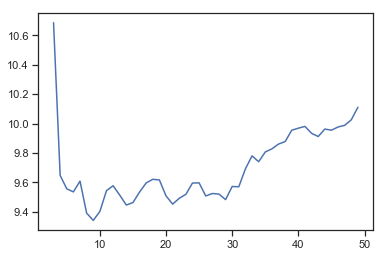

In [80]:
nbrOfNodes = []
errors     = []
for k in range(3,50,1):
    treeModel = DecisionTreeRegressor(max_leaf_nodes=k, random_state=0)
    treeModel.fit(train_Xage, train_yage)
    preds_val = treeModel.predict(valid_Xage)
    mae = mean_absolute_error(valid_yage, preds_val)
    nbrOfNodes.append(k)
    errors.append(mae)

plt.plot(nbrOfNodes,errors)

25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 

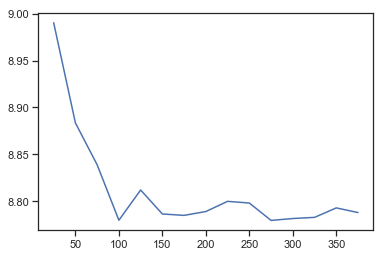

In [81]:
nbrOfNodes = []
errors     = []
for k in range(25,400,100):
    print(k,end=' ')
    forestModel = RandomForestRegressor(n_estimators=k, 
                                        random_state=0, 
                                        criterion='mae', 
                                        min_samples_split=5,
                                        max_depth=10
                                        )
    forestModel.fit(train_Xage, train_yage)
    preds_val = forestModel.predict(valid_Xage)
    mae = mean_absolute_error(valid_yage, preds_val)
    nbrOfNodes.append(k)
    errors.append(mae)

plt.plot(nbrOfNodes,errors)

In [82]:
xgboostModel = XGBRegressor(objective ='reg:squarederror',
                        n_estimators=400,
                        learning_rate=0.15,
                        n_jobs=4)

xgboostModel.fit(train_Xage, train_yage, 
             early_stopping_rounds=15, 
             eval_set=[(valid_Xage, valid_yage)],
             verbose=False)

preds_val = xgboostModel.predict(valid_Xage)
mae = mean_absolute_error(valid_yage, preds_val)
print(mae)

9.053182324707963


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



# Calculating missing Ages

In [83]:
forestModel = RandomForestRegressor(n_estimators=200, 
                                        random_state=0, 
                                        criterion='mae', 
                                        min_samples_split=5,
                                        max_depth=10
                                        )

forestModel.fit(train_Xage, train_yage)
predictesAges = forestModel.predict(test_Xage)
#dfCombinedAgeMissing['estAge']=predictesAges

In [84]:
passId = test_Xage['PassengerId'].to_numpy()
predAges = predictesAges
dictPassId_predAges = {}
for k in range(len(passId)):
    dictPassId_predAges[passId[k]]=predAges[k]
#dictPassId_predAges

In [85]:
allColls = dfTrain.columns.to_list()
print(allColls)
feature_names2 = allColls
feature_names2.remove('Survived')
feature_names2.remove('Cabin')
feature_names2.remove('Name')
#feature_names2.remove('Embarked')
#feature_names2.remove('Fare')

dfTrain2 = dfTrain[feature_names2].copy()
dfTrain2['estAge'] = 'NA'

dfTest2 = dfTest[feature_names2].copy()
dfTest2['estAge'] = 'NA'

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Lastname', 'Title', 'FamilySize', 'IsAlone', 'TicketClean']


In [86]:
for k in range(1,dfTrain2.shape[0]+1,1):
    dfTrain2.at[k-1,'estAge'] = dictPassId_predAges.get(k,dfTrain2.iloc[k-1]['Age'])

for k in range(1,dfTest2.shape[0]+1,1):
    j = dfTest2.loc[k-1].PassengerId
    dfTest2.loc[k-1,'estAge'] = dictPassId_predAges.get(j,dfTest2.iloc[k-1]['Age'])

## Add age band

In [87]:
bandSize = 16
dfTrain2['estAgeBand'] = (dfTrain2['estAge']/bandSize).astype('int')
dfTest2['estAgeBand'] = (dfTest2['estAge']/bandSize).astype('int')

## Add fare band

In [88]:
bandSize = 16
freq_Fare = dfTrain.Fare.dropna().mode()[0]
dfTrain2['Fare'] = dfTrain2['Fare'].fillna(freq_Fare)
dfTest2['Fare']  = dfTest2['Fare'].fillna(freq_Fare)

dfTrain2['FareBand'] = (dfTrain2['Fare']/bandSize).astype('int')
dfTest2['FareBand'] = (dfTest2['Fare']/bandSize).astype('int')

thresh = 4
dfTrain2['FareBand'] = [x if x < thresh else thresh for x in dfTrain2['FareBand'].to_numpy()]
dfTest2['FareBand'] = [x if x < thresh else thresh for x in dfTest2['FareBand'].to_numpy()]

set(dfTrain2['FareBand'])

{0, 1, 2, 3, 4}

## Add Children in Class 1 or 2 

In [89]:
dfTrain2['ChildP12']=((dfTrain2['estAge']<16) & (dfTrain2['Pclass']<3)).map( {True: 1, False: 0} ).astype(int)
dfTest2['ChildP12'] =((dfTest2['estAge']<16)  & (dfTest2['Pclass']<3)).map( {True: 1, False: 0} ).astype(int)

In [90]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 40)
dfTrain2
#dfTest2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lastname,Title,FamilySize,IsAlone,TicketClean,estAge,estAgeBand,FareBand,ChildP12
0,1,3,1,22.0,1,0,720,7.2500,2,100,4,2,0,719,22,1,0,0
1,2,1,0,38.0,1,0,816,71.2833,0,182,5,2,0,816,38,2,4,0
2,3,3,0,26.0,0,0,914,7.9250,2,329,3,1,1,906,26,1,0,0
3,4,1,0,35.0,1,0,65,53.1000,2,267,5,2,0,65,35,2,3,0
4,5,3,1,35.0,0,0,649,8.0500,2,15,4,1,1,649,35,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,130,13.0000,2,535,0,1,1,130,27,1,0,0
887,888,1,0,19.0,0,0,18,30.0000,2,294,3,1,1,18,19,1,1,0
888,889,3,0,NaN,1,2,923,23.4500,2,383,3,4,0,924,5.58655,0,1,0
889,890,1,1,26.0,0,0,11,30.0000,0,69,4,1,1,11,26,1,1,0


# Model testing for Survival calc

In [147]:
feature_names3=['PassengerId','Pclass','Sex','SibSp','Parch','Ticket','TicketClean','Lastname','Title','estAge','estAgeBand','Embarked','FamilySize','IsAlone','FareBand','ChildP12']
feature_names3=['IsAlone','Sex','Pclass','FareBand','estAgeBand','Lastname']
#feature_names3=['Sex','FareBand','IsAlone','ChildP12','estAgeBand','Title']

dfTrain2['estAge'] = pd.to_numeric(dfTrain2['estAge'])
dfTest2['estAge'] = pd.to_numeric(dfTest2['estAge'])

X = dfTrain2[feature_names3]
y = dfTrain['Survived']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)
print('SampleSize of Age training set: ',X.shape[0],train_X.shape[0],valid_X.shape[0],train_X.shape[0]/X.shape[0])

XTest = dfTest2[feature_names3]


SampleSize of Age training set:  891 668 223 0.7497194163860831


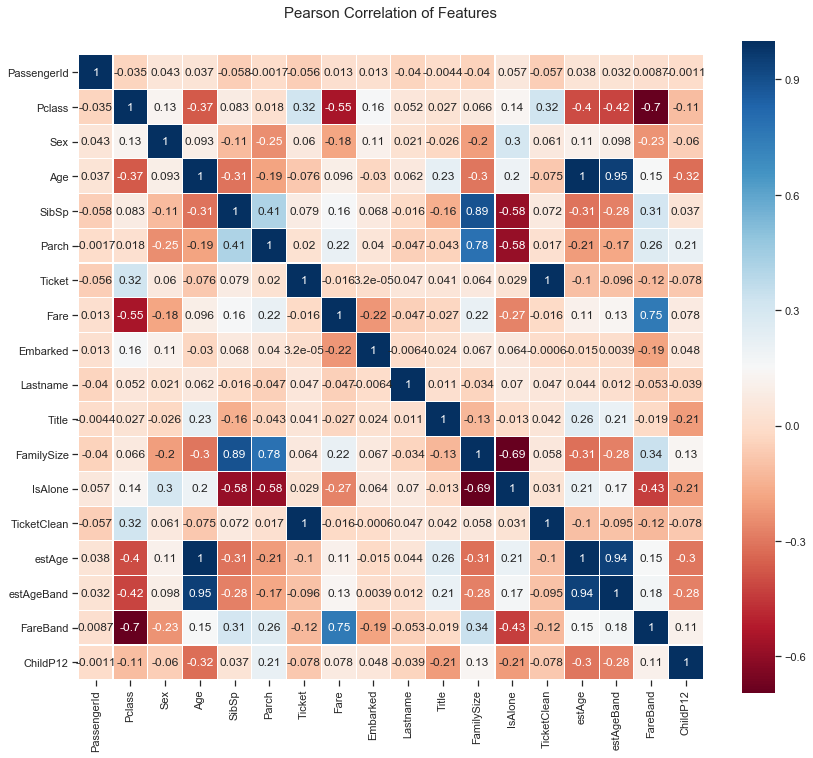

In [148]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dfTrain2.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [149]:
X = valid_X
y = valid_y

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(train_X, train_y)
preds_val = logreg.predict(valid_X)
cm_log = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_log
hit_log=(tp+tn)/(tn+fp+fn+tp)
acc_log = round(logreg.score(X, y) * 100, 2)

# Support Vector Machines
#svc = SVC(gamma='auto')
svc = SVC(gamma='scale',probability=True)
svc.fit(train_X, train_y)
preds_val = svc.predict(valid_X)
cm_svc = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_svc
hit_svc = (tp+tn)/(tn+fp+fn+tp)
acc_svc = round(svc.score(X, y) * 100, 2)

# K nearest neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)
preds_val = knn.predict(valid_X)
cm_knn = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_knn
hit_knn = (tp+tn)/(tn+fp+fn+tp)
acc_knn = round(knn.score(X, y) * 100, 2)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
preds_val = gaussian.predict(valid_X)
cm_gaussian =  confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_gaussian
hit_gaussian = (tp+tn)/(tn+fp+fn+tp)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)

# Perceptron
perceptron = Perceptron(max_iter=1000,tol=1e-4)
perceptron.fit(train_X, train_y)
preds_val = perceptron.predict(valid_X)
cm_perceptron = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_perceptron
hit_perceptron = (tp+tn)/(tn+fp+fn+tp)
acc_perceptron = round(perceptron.score(X, y) * 100, 2)

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=10000,
                    tol=1e-4,
                    random_state=10)
sgd.fit(train_X, train_y)
preds_val = sgd.predict(valid_X)
cm_sgd = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_sgd
hit_sgd = (tp+tn)/(tn+fp+fn+tp)
acc_sgd = round(sgd.score(X, y) * 100, 2)

# Linear SVC
linear_svc = LinearSVC(max_iter=100000,dual=False)
linear_svc.fit(train_X, train_y)
preds_val = linear_svc.predict(valid_X)
cm_linear_svc = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_linear_svc
hit_linear_svc = (tp+tn)/(tn+fp+fn+tp)
acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
preds_val = decision_tree.predict(valid_X)
cm_decision_tree = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_decision_tree
hit_decision_tree = (tp+tn)/(tn+fp+fn+tp)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=1100, 
                                       #criterion='entropy',
                                       #max_features='sqrt'
                                       criterion='gini',
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=0,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       max_depth=6,
                                       n_jobs=-1
                                      )

random_forest.fit(train_X, train_y)
preds_val = random_forest.predict(valid_X)
cm_random_forest = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_random_forest
hit_random_forest = (tp+tn)/(tn+fp+fn+tp)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

# ADAboost
adaBoost = AdaBoostClassifier(n_estimators=300, 
                                random_state=0,
                                learning_rate=0.1
                              )
adaBoost.fit(train_X, train_y)
preds_val = adaBoost.predict(valid_X)
cm_ada = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_ada
hit_ada = (tp+tn)/(tn+fp+fn+tp)
adaBoost.score(X, y)
acc_ada = round(adaBoost.score(X, y) * 100, 2)

# ExtraTrees
extraTrees = ExtraTreesClassifier(n_jobs=-1,
                                n_estimators=500,
                                #max_features=0.5,
                                max_depth=8,
                                min_samples_leaf=2)
extraTrees.fit(train_X, train_y)
preds_val = extraTrees.predict(valid_X)
cm_et = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_et
hit_et = (tp+tn)/(tn+fp+fn+tp)
extraTrees.score(X, y)
acc_et = round(extraTrees.score(X, y) * 100, 2)

# GradientBoosting
gb = GradientBoostingClassifier(n_estimators= 150,
                             max_depth= 5,
                             learning_rate=0.05,
                             min_samples_leaf= 2)
gb.fit(train_X, train_y)
preds_val = gb.predict(valid_X)
cm_gb = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_gb
hit_gb = (tp+tn)/(tn+fp+fn+tp)
gb.score(X, y)
acc_gb = round(gb.score(X, y) * 100, 2)

# XGBoost
xgboostModel = XGBClassifier(learning_rate = 0.02,
                             n_estimators= 2000,
                             max_depth= 4,
                             min_child_weight= 2,
                             #gamma=1,
                             gamma=0.9,                        
                             subsample=0.8,
                             colsample_bytree=0.8,
                             objective= 'binary:logistic',
                             #objective ='reg:squarederror',
                             nthread= -1,
                             scale_pos_weight=1)
xgboostModel.fit(train_X, train_y)
preds_val = xgboostModel.predict(valid_X)
cm_xgb = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_xgb
hit_xgb = (tp+tn)/(tn+fp+fn+tp)
xgboostModel.score(X, y)
acc_xgb = round(xgboostModel.score(X, y) * 100, 2)

# lightgbm
gbm = lgb.LGBMClassifier(boosting_type='gbdt',
                        objective='binary',
                        num_leaves=31,
                        learning_rate=0.05,
                        #num_boost_round=100000,
                        n_estimators=200,
                        silent=-1,
                        verbose=-1)
gbm.fit(train_X, train_y,
        eval_set=[(valid_X, valid_y)],
        eval_metric='l1',
        early_stopping_rounds=5,
        verbose=100)
preds_val = gbm.predict(valid_X)
cm_gbm = confusion_matrix(valid_y, preds_val).ravel()
tn, fp, fn, tp = cm_gbm
hit_gbm = (tp+tn)/(tn+fp+fn+tp)
gbm.score(X, y)
acc_gbm = round(gbm.score(X, y) * 100, 2)

Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[53]	valid_0's l1: 0.300298	valid_0's binary_logloss: 0.502671


In [150]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC','Decision Tree',
              'XGBoost','lightgbm','AdaBoost','extraTrees','GradientBoost'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, 
              acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, 
              acc_xgb, acc_gbm, acc_ada, acc_et, acc_gb],
    'hitScore': [cm_svc, cm_knn, cm_log, cm_random_forest, cm_gaussian, 
                 cm_perceptron, cm_sgd, cm_linear_svc, cm_decision_tree,
                 cm_xgb, cm_gbm, cm_ada, cm_et, cm_gb]})
pd.set_option("display.max_rows", None)
models.sort_values(by='Score', ascending=False)

,Model,Score,hitScore
7,Linear SVC,79.82,"[112, 16, 29, 66]"
12,extraTrees,79.37,"[116, 12, 34, 61]"
2,Logistic Regression,78.92,"[109, 19, 28, 67]"
8,Decision Tree,78.92,"[114, 14, 33, 62]"
9,XGBoost,77.13,"[115, 13, 38, 57]"
13,GradientBoost,77.13,"[117, 11, 40, 55]"
3,Random Forest,76.68,"[120, 8, 44, 51]"
10,lightgbm,76.68,"[122, 6, 46, 49]"
11,AdaBoost,76.23,"[109, 19, 34, 61]"
4,Naive Bayes,72.65,"[103, 25, 36, 59]"


In [33]:
print(train_X.columns.values)
print(decision_tree.feature_importances_)
print(extraTrees.feature_importances_)
print(random_forest.feature_importances_)
print(xgboostModel.feature_importances_)
print(gb.feature_importances_)
print(gbm.feature_importances_/sum(gbm.feature_importances_))
print(adaBoost.feature_importances_)

['Sex' 'FareBand' 'IsAlone' 'ChildP12' 'estAgeBand']
[0.57194109 0.16720796 0.03202363 0.11511916 0.11370816]
[0.54447373 0.18109904 0.04838378 0.09928945 0.126754  ]
[0.47892113 0.22121224 0.05213965 0.08520751 0.16251947]
[0.5499657  0.0951359  0.05507919 0.20405756 0.09576169]
[0.57914249 0.15998534 0.0284276  0.11249356 0.11995101]
[0.07190413 0.32090546 0.14380826 0.03595206 0.42743009]
[0.14666667 0.29666667 0.11333333 0.07       0.37333333]


In [34]:
estimate = np.around(gbm.predict(XTest)).astype(int)
df=pd.DataFrame(dfTest['PassengerId'])
df.insert(1,'Survived',estimate)
df.to_csv('titanic_CT10.csv', index=False)

In [35]:
pd.set_option("display.max_rows", None)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
